<a href="https://colab.research.google.com/github/KingJulien0709/RowingAnalytics/blob/main/rowing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
from google.colab import drive
drive.mount('/content/drive')
from ultralytics import YOLO

model = YOLO("yolo11n-pose.pt")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 47.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 5.97M/5.97M [00:00<00:00, 171MB/s]


In [ ]:
video_path= "/content/drive/My Drive/ergo_berg.mp4" 

In [ ]:
#video_path = "/content/drive/My Drive/ergo_short2_small.mp4"
#"/content/drive/My Drive/video_row2.mp4"
import src.video_processing as vp

result, frame_rate = vp.predict_poses(video_path, model, save_video=False)
print(result[0].keypoints)

In [ ]:
import pickle
#read a file with path and labels of the strokes per video and safe all of them in a pickle file
PICKLE_NAME = "estimated_pose_strokes.pickle"

def save_pose_to_pickle(keypoints,labels, video_id):
  with open(PICKLE_NAME, "wb") as f:
    pickle.dump({video_id: {"keypoints": keypoints, "labels": labels}}, f)
    f.close()

def read_pose_from_pickle(video_id):
  with open(PICKLE_NAME, "rb") as f:
    data = pickle.load(f)
    f.close()
  return data[video_id]

def read_pose_from_pickle_all():
  with open(PICKLE_NAME, "rb") as f:
    data = pickle.load(f)
    f.close()
  return data






In [ ]:
def interpolate_wrong_numbers(keyframes):
  error_values = torch.any(keyframes[:, :,0:2]==0, dim=(1,2))
  #selected_joints_keyframes[error_values] = torch.
  keyframe_nparray = keyframes.numpy()
  #for i in range(keyframe_nparray.shape[0]):
   # for j in range(keyframe_nparray.shape[1]):


In [ ]:
import src.video_processing as vp


res = vp.get_relevant_normalized_keyframes(result[0:5], frame_rate, [6, 8, 10, 12, 14, 16])
print(res)

431
torch.Size([431, 6, 2])
torch.Size([431, 6, 2])
tensor([0.2931, 0.2870, 0.2893, 0.2898, 0.2858, 0.2889, 0.2981, 0.2893, 0.2893, 0.2939, 0.3005, 0.3021, 0.3040, 0.3071, 0.3049, 0.3059, 0.3238, 0.3181, 0.3214, 0.3231, 0.3167, 0.3201, 0.3285, 0.3350, 0.3440, 0.3313, 0.3335, 0.3517, 0.3534, 0.3542, 0.3557, 0.3604, 0.3687, 0.3661, 0.3686, 0.3700, 0.3726, 0.3688, 0.3665,
        0.3641, 0.3630, 0.3628, 0.3603, 0.3576, 0.3458, 0.3480, 0.3385, 0.3370, 0.3346, 0.3305, 0.3220, 0.3210, 0.3107, 0.3062, 0.2991, 0.2964, 0.2993, 0.3037, 0.2905, 0.2858, 0.2855, 0.2835, 0.2850, 0.2954, 0.2854, 0.2755, 0.2806, 0.2599, 0.2604, 0.2774, 0.2675, 0.2639, 0.2537, 0.2792, 0.2751, 0.2656, 0.2634, 0.2802,
        0.2728, 0.3040, 0.3056, 0.3122, 0.3132, 0.3172, 0.3203, 0.3236, 0.2793, 0.2810, 0.2824, 0.3098, 0.3052, 0.3043, 0.3047, 0.2802, 0.2733, 0.2794, 0.2826, 0.2824, 0.2837, 0.2856, 0.2980, 0.2985, 0.3011, 0.2984, 0.3006, 0.3085, 0.3180, 0.3136, 0.3116, 0.3282, 0.3295, 0.3515, 0.3535, 0.3599, 0.3624, 0.36

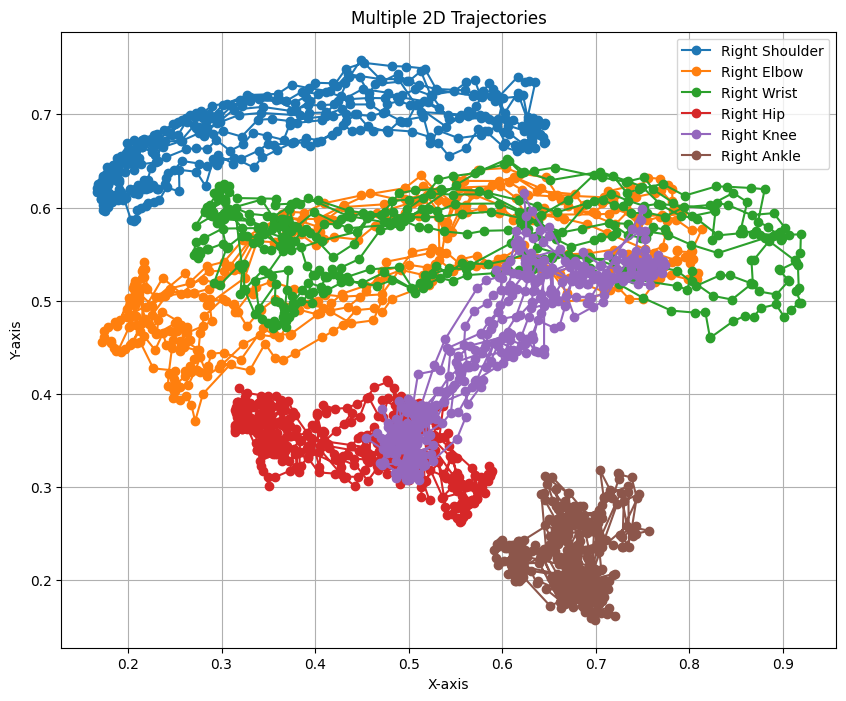

In [ ]:
import torch
import matplotlib.pyplot as plt

def get_relevant_normalized_keyframes(results, frame_rate, selected_joints, remove_wrong_numbers=False, all=False):
  normalized_keyframes_tensor = [(result.keypoints.xyn, result.keypoints.conf) for result in results]
  conf_score = [result.keypoints.conf for result in results]
  #key_point = (x,y,c)
  if all:
    selected_joints_keyframes = torch.stack(normalized_keyframes_tensor)
  else:
    selected_joints_keyframes = torch.stack([n_k_t.squeeze(0)[selected_joints] for n_k_t in normalized_keyframes_tensor])
  if remove_wrong_numbers:
    error_values = torch.any(selected_joints_keyframes[:, :,0:2]==0, dim=(1,2))
    selected_joints_keyframes = selected_joints_keyframes[~error_values]
  return selected_joints_keyframes

body_parts = {
    0: "Nose",
    1: "Left Eye",
    2: "Right Eye",
    3: "Left Ear",
    4: "Right Ear",
    5: "Left Shoulder",
    6: "Right Shoulder",
    7: "Left Elbow",
    8: "Right Elbow",
    9: "Left Wrist",
    10: "Right Wrist",
    11: "Left Hip",
    12: "Right Hip",
    13: "Left Knee",
    14: "Right Knee",
    15: "Left Ankle",
    16: "Right Ankle"
}
print(len(result))
result_copy = []



normalized_keyframes_tensor = [result[0].keypoints.xyn for result in result]
selcted_joints = [6, 8, 10, 12, 14, 16]

#print(normalized_keyframes_tensor[:][0].shape)

#keyframe = normalized_keyframes_tensor[0]#.squeeze(0)
#print(keyframe.shape)
#selected_joints_keyframe = keyframe[selcted_joints]




selected_joints_keyframes = torch.stack([n_k_t.squeeze(0)[selcted_joints] for n_k_t in normalized_keyframes_tensor])
error_values = torch.any(selected_joints_keyframes[:, :,0:2]==0, dim=(1,2))
filtered_keyframes = selected_joints_keyframes[~error_values]
#selected_joints_keyframes[error_values] =
print(filtered_keyframes.shape)

print(selected_joints_keyframes.shape)


#plot the trajectories
print(filtered_keyframes[:,0,1])
trajectories = { body_parts[selcted_joints[i]]: (filtered_keyframes[:,i,0], filtered_keyframes[:,i,1]) for i in range(len(selcted_joints))}

#trajectories = {
#    "joint_0": (filtered_keyframes[:,0,0], filtered_keyframes[:,0,1]),
#    "joint_1": (filtered_keyframes[:,1,0], filtered_keyframes[:,1,1]),
#    "joint_2": (filtered_keyframes[:,2,0], filtered_keyframes[:,2,1]),
 #   "joint_8": (filtered_keyframes[:,3,0], filtered_keyframes[:,3,1]),
#}


plt.figure(figsize=(10, 8))
for label, (x, y) in trajectories.items():
    plt.plot(x.cpu(), 1-y.cpu(), marker='o', label=label)

# Customizing the plot
plt.title("Multiple 2D Trajectories")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.legend()  # Add legend to distinguish paths
plt.show()

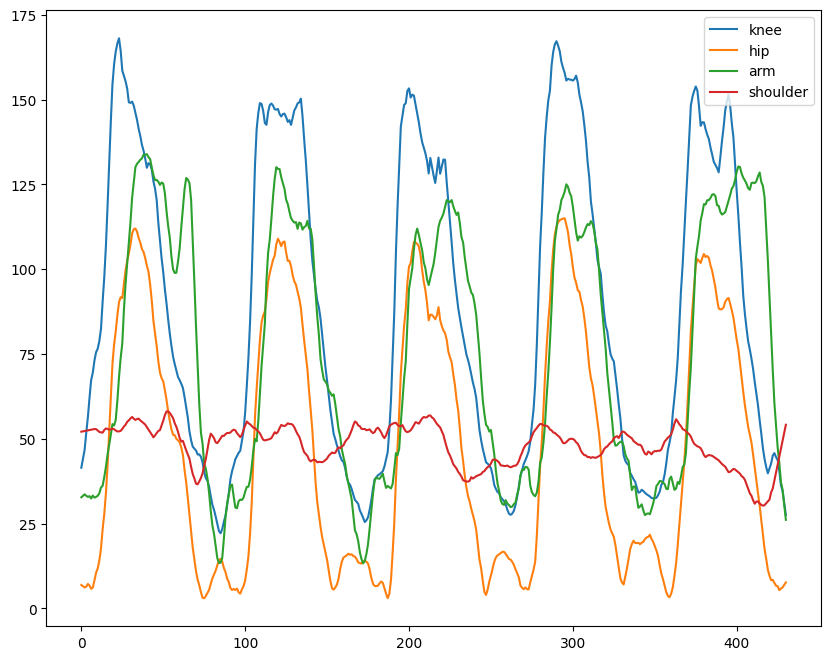

In [ ]:
#calculate distances between keypoints
from scipy.signal import savgol_filter
import src.stroke_processing as sp


selected_angle_pairs = torch.tensor([
    [[4, 5],[4, 3]], #knee angle
    [[3,2],[3,4]], #hip angle
    [[1,2],[1,0]], #arm angle
    [[2,1],[2,3]], #shoulder angle
])



timestep = 31
anglepair = 0
#v1_single_v = filtered_keyframes[:, selected_angle_pairs[anglepair, 0, 0]] - filtered_keyframes[:, selected_angle_pairs[anglepair, 0, 1]]
#v2_single_v = filtered_keyframes[:, selected_angle_pairs[anglepair, 1, 0]] - filtered_keyframes[:, selected_angle_pairs[anglepair, 1, 1]]
#angles = torch.acos(torch.sum(v1_single_v * v2_single_v, dim=1) / (torch.norm(v1_single_v, dim=1) * torch.norm(v2_single_v, dim=1)))*180/3.14
#angles =

angles_knee = sp.calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[0])
angles_hip = sp.calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[1])
angles_arm = sp.calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[2])
angles_shoulder = sp.calculate_angles_for_joint(filtered_keyframes, selected_angle_pairs[3])

window_length = frame_rate // 5 #for consistent smoothing adjust the windowlenght to the framerate
smoothed_angles_knee = savgol_filter(angles_knee.cpu().numpy(), window_length=window_length, polyorder=1)
smoothed_angles_hip = savgol_filter(angles_hip.cpu().numpy(), window_length=window_length, polyorder=1)
smoothed_angles_arm = savgol_filter(angles_arm.cpu().numpy(), window_length=window_length, polyorder=1)
smoothed_angles_shoulder = savgol_filter(angles_shoulder.cpu().numpy(), window_length=window_length*3, polyorder=1)

plt.figure(figsize=(10, 8))
plt.plot(smoothed_angles_knee)
plt.plot(smoothed_angles_hip)
plt.plot(180-smoothed_angles_arm) #show "reversed" angle to allign for phase analysis
plt.plot(smoothed_angles_shoulder)
#plt.plot(angles_arm.cpu())
#plt.plot(angles_shoulder.cpu())
plt.legend(["knee", "hip", "arm" ,"shoulder"])
plt.show() #sharp peakes in the plot show the removed values/values beeing out of the camera view -> interpolate should be better than complety removing.

#print(angles_hip)


#print(v1_single_v.shape)
#print(v2_single_v.shape)

#distance = torch.cdist(filtered_keyframes, filtered_keyframes)
#print(distance.shape)
#distances = [distance for

In [ ]:
import numpy as np



In [ ]:
#divide in single strokes
from scipy.signal import find_peaks
import numpy as np
import src.visualizing as vis

##find local minima and maxima, use only minima
min_peaks = sp.extract_stroke_sequences_gradient(smoothed_angles_knee)

##divide into single strokes
strokes = []

#print(min_peaks)
for i in range(len(min_peaks)-1):
  smoothed_angles_knee_slice = smoothed_angles_knee[min_peaks[i]:min_peaks[i+1]]
  smoothed_angles_hip_slice = smoothed_angles_hip[min_peaks[i]:min_peaks[i+1]]
  smoothed_angles_arm_slice = 180-smoothed_angles_arm[min_peaks[i]:min_peaks[i+1]] #invert arm agle for better visulisation
  #smoothed_angles_shoulder_slice = smoothed_angles_shoulder[min_peaks[i]:min_peaks[i+1]]
  strokes.append([smoothed_angles_knee_slice, smoothed_angles_hip_slice, smoothed_angles_arm_slice])#, smoothed_angles_shoulder_slice])
print(len(strokes))


#plot_single_stroke(strokes[2], ["knee", "hip", "arm"], normalize=True)
for stroke in strokes:
  vis.plot_single_stroke(stroke.copy(), ["knee", "hip", "arm"], normalize=False,derivativ=True)

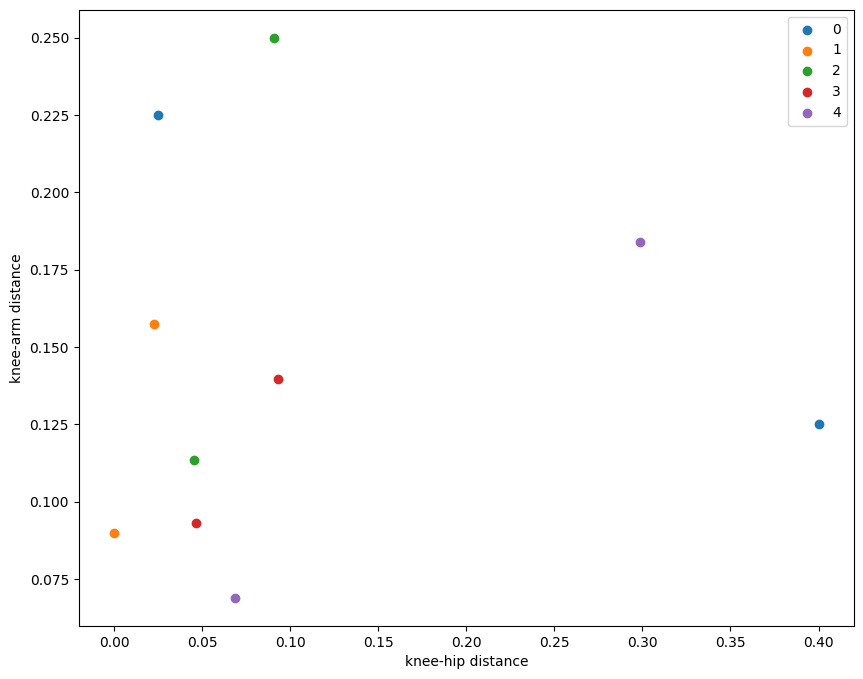

In [ ]:
##analyse stroke
#basic timing analysis with first order derivativ maxima and minima
def analyse_stroke(stroke,use_derivativ=True):
  stroke_absolut_length = len(stroke[0])
  stroke_duration = float(stroke_absolut_length/frame_rate)
  #print(stroke_duration)
  stroke_rate = round(60/stroke_duration)
  #print(stroke_rate)
  dx_angles = np.diff(stroke.copy())
  if use_derivativ:
    dx_angles = np.diff(savgol_filter(stroke.copy(), window_length=frame_rate//3, polyorder=1))
  #print(dx_angles.shape)
  maxima = np.argmax(dx_angles, axis=1)/(stroke_absolut_length/2)
  minima = np.argmin(dx_angles, axis=1)/(stroke_absolut_length/2)
  #print(np.diff(maxima))
  #print(np.diff(minima))
  timing_ditances = [np.diff(maxima), np.diff(minima)]
  #print(timing_ditances)

  return timing_ditances

  #for i in range(len(dx_angles)):
  #  plt.plot(dx_angles[i])
  #plt.plot(maxima)
  #plt.plot(minima)
  #plt.show()
  #print(maxima)

  #distances = np.diff(maxima)
  #print(distances)





plt.figure(figsize=(10, 8))
plt.xlabel("knee-hip distance")
plt.ylabel("knee-arm distance")
for i in range(len(strokes)):
  timings = analyse_stroke(strokes[i])
  x_coords, y_coords = zip(*timings)
  plt.scatter(x_coords, y_coords, marker='o', label=str(i))
  #plt.scatter(x_coords[1], y_coords[1], marker='o', label="minima" + str(i))

plt.legend()
plt.show()


In [ ]:
# keypoint as form of K * (x,y,c)
def create_joint_heatmaps(keypoints):
  x,y,c = keypoints[0]
  j_map_k = torch.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import random
import matplotlib.pyplot as plt


KEY_POINTS = 17
LIMB_SEQ = [
    # Head and Neck
    [0, 5],  # Nase → Linke Schulter
    [0, 6],  # Nase → Rechte Schulter

    # Upper Body
    [5, 7],  # Linke Schulter → Linker Ellenbogen
    [7, 9],  # Linker Ellenbogen → Linkes Handgelenk
    [6, 8],  # Rechte Schulter → Rechter Ellenbogen
    [8, 10], # Rechter Ellenbogen → Rechtes Handgelenk

    # Torso
    [5, 11], # Linke Schulter → Linke Hüfte
    [6, 12], # Rechte Schulter → Rechte Hüfte
    [11, 12],# Linke Hüfte → Rechte Hüfte (Spine)

    # Lower Body
    [11, 13],# Linke Hüfte → Linkes Knie
    [13, 15],# Linkes Knie → Linkes Fußgelenk
    [12, 14],# Rechte Hüfte → Rechtes Kniegelenk
    [14, 16],# Rechtes Kniegelenk → Rechter Knöchel

    # Optional Head Details
    [0, 1],  # Nase → Linkes Auge
    [0, 2],  # Nase → Rechtes Auge
    [1, 3],  # Linkes Auge → Linkes Ohr
    [2, 4]   # Rechtes Auge → Rechtes Ohr
]





#demo_keypoints = create_demo_keypoints(KEY_POINTS, 56, 56)
#l_map = create_gaussian_limb_map(demo_keypoints, 56, 56, LIMB_SEQ, std=0.5)
#j_map = create_gaussian_joint_map(demo_keypoints, 56, 56, std=1)
#print(j_map.shape)
#plt.imshow(create_max_pooling_map(j_map))
#plt.show()
#plt.imshow(create_max_pooling_map(l_map))
#plt.show()


In [ ]:
T=48

def pipeline(stroke, classical=False, segmented = False):
  results, framerate = predict_poses(stroke.path)
  if classical:
    keypoints = get_relevant_normalized_keyframes(results=results, framerate=framerate, keypoints=["knee", "hip", "arm"])
    angles = get_angles(keypoints)##calculate angles for pairs not the actual function here
    strokes = [stroke]
    if not segmented:
      stroke = [_ for s  in segemneted_strokes(stroke)] #implement but have to be selected
      print("not implemented yet, have to segment stroke sequence into single strokes")
      #add to list
    print("not implemented yet, can directly interpret stroke or array of strokes")
    timing = [analyse_stroke(stroke) for stroke in strokes]

    ## compare to other strokes timing with dtw and knn
    feedback = [analyse_stroke(stroke) for stroke in strokes]
    return feedback
  else:
    #1. segment if not segmented
    if not segmented:
      return None
    keypoints = get_relevant_normalized_keyframes(results=results, framerate=framerate, keypoints=[],all=True)
    #2. sample t to T (time dimension) first for faster computation, compared to original paper
    keypoints = uniform_sample_from_frames(keypoints, T)
    #3. cast to probabalistic framework by gaussians and scale to 0,55 for H and W, only for joints, limps are computational too expensive
    kexpoints = keypoints * [56, 56, 1]
    j_map, roi = create_gaussian_joint_map(keypoints, 56, 56, std=1)
    #4. zoom_crop to ROI
    zoomed_j_map = zoom_to_roi(j_map, roi)
    print(zoomed_j_map)

    #put into 3dpose cnn
    #feedback = class (with score by distance to positive class)
    #feedback = calculate_feedback(disimilarity, class_vector)


